# Insights Into Unicorn Companies-EDA:Structuring Raw Data

## Step 1: Imports 

### Import relevant libraries and modules

In [1]:
# Import the relevant Python libraries and modules needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset into a DataFrame

In [22]:
companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2: Data exploration


### Display the first rows of the data

In [23]:
# Display the first rows of the data.
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Identify the number of rows and columns

In [24]:
# Identify the number of rows and columns in the dataset.
companies.shape

(1074, 10)

### Handling duplicates and null values in the data

In [25]:
# Check for duplicates in the dataset.
print(companies.drop_duplicates().shape)

# Check for null values in the dataset.
print(companies.isnull().sum())

# Drop 'city' and 'investors' columns containing null values without removing companies from the list.
companies = companies.dropna(axis=1)
print(companies.shape)

(1074, 10)
Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64
(1074, 8)


### Display the data types of the columns 


In [6]:
# Display the metadata of the columns.
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1074 non-null   object
 1   Valuation       1074 non-null   object
 2   Date Joined     1074 non-null   object
 3   Industry        1074 non-null   object
 4   Country/Region  1074 non-null   object
 5   Continent       1074 non-null   object
 6   Year Founded    1074 non-null   int64 
 7   Funding         1074 non-null   object
dtypes: int64(1), object(7)
memory usage: 67.2+ KB


### Sort the data

In [7]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.
companies.sort_values(by="Year Founded", ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,Country/Region,Continent,Year Founded,Funding
782,Phantom,$1B,1/31/22,Fintech,United States,North America,2021,$118M
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,China,Asia,2021,$151M
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,India,Asia,2021,$185M
554,ClickHouse,$2B,10/28/21,Data management & analytics,United States,North America,2021,$300M
952,LayerZero Labs,$1B,3/30/22,Internet software & services,United States,North America,2021,$143M
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Germany,Europe,2021,$1B
864,Aptos,$1B,3/15/22,Internet software & services,United States,North America,2021,$200M
238,Yuga Labs,$4B,3/22/22,Fintech,United States,North America,2021,$450M
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,United States,North America,2021,$430M
967,Mensa Brands,$1B,11/16/21,Other,India,Asia,2021,$218M


### Determine the number of companies founded each year

In [8]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.
companies["Year Founded"].value_counts().sort_values(ascending=False)

2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: Year Founded, dtype: int64

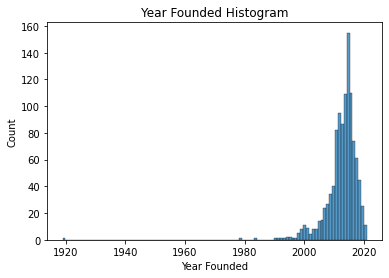

In [9]:
# Plot a histogram of the Year Founded feature.
sns.histplot(x=companies["Year Founded"])
plt.title("Year Founded Histogram");

### Convert the `Date Joined` column to datetime

In [10]:
# Convert the `Date Joined` column to datetime.
# Update the column with the converted values.
companies["Date Joined"]=pd.to_datetime(companies["Date Joined"])

### Create a `Month Joined` column

In [11]:
# Obtain the names of the months when companies gained unicorn status.
# Use the result to create a `Month Joined` column.
companies["Month Joined"]=companies["Date Joined"].dt.month_name()

# Display the first few rows of `companies`
# to confirm that the new column did get added.
companies.head()

,Company,Valuation,Date Joined,Industry,Country/Region,Continent,Year Founded,Funding,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,China,Asia,2012,$8B,April
1,SpaceX,$100B,2012-12-01,Other,United States,North America,2002,$7B,December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,China,Asia,2008,$2B,July
3,Stripe,$95B,2014-01-23,Fintech,United States,North America,2010,$2B,January
4,Klarna,$46B,2011-12-12,Fintech,Sweden,Europe,2005,$4B,December


### Create a `Years To Join` column

In [12]:
# Determine how many years it took for companies to reach unicorn status.
# Use the result to create a `Years To Join` column.
companies["Years to Join"]=companies["Date Joined"].dt.year-companies["Year Founded"]

# Display the first few rows of `companies`
# to confirm that the new column did get added.
companies.head()

,Company,Valuation,Date Joined,Industry,Country/Region,Continent,Year Founded,Funding,Month Joined,Years to Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,China,Asia,2012,$8B,April,5
1,SpaceX,$100B,2012-12-01,Other,United States,North America,2002,$7B,December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,China,Asia,2008,$2B,July,10
3,Stripe,$95B,2014-01-23,Fintech,United States,North America,2010,$2B,January,4
4,Klarna,$46B,2011-12-12,Fintech,Sweden,Europe,2005,$4B,December,6


### Gain more insight on a specific year

In [13]:
# Filter dataset by 2021 since it is the most recent complete year for the dataset
# Save the resulting subset in a new variable. 
companies_2021=companies[companies["Date Joined"].dt.year==2021]

# Display the first few rows of the subset to confirm that it was created.
companies_2021

,Company,Valuation,Date Joined,Industry,Country/Region,Continent,Year Founded,Funding,Month Joined,Years to Join
12,FTX,$32B,2021-07-20,Fintech,Bahamas,North America,2018,$2B,July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Indonesia,Asia,2015,$5B,April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,United Kingdom,Europe,2011,$490M,February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,United States,North America,2017,$427M,July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Turkey,Europe,2015,$2B,March,6
...,...,...,...,...,...,...,...,...,...,...
1065,XForcePlus,$1B,2021-06-01,Internet software & services,China,Asia,2015,$200M,June,6
1067,YipitData,$1B,2021-12-06,Internet software & services,United States,North America,2008,$492M,December,13
1068,Yunxuetang,$1B,2021-03-29,Edtech,China,Asia,2011,$389M,March,10
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,China,Asia,2018,$80M,May,3


### Observe trends over quarters

In [14]:
# Create a quarter interval column for 2021 and group by the intervals to count companies joined in each quarter.
companies_2021["Quarter Joined"] = companies_2021["Date Joined"].dt.to_period("Q").dt.strftime('%Y-Q%q')
companies_2021_by_quarter = companies_2021.groupby("Quarter Joined")["Company"].count().reset_index().rename(columns={"Company": "Number of Companies"})

# Display the first few rows of the new DataFrame.
companies_2021_by_quarter.head()

,Quarter Joined,Number of Companies
0,2021-Q1,108
1,2021-Q2,144
2,2021-Q3,134
3,2021-Q4,134


### Compare trends over time

In [15]:
# Filter companies joined in the additional year of interest (2020).
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

# Concatenate the subset of 2020 with the previously defined subset for 2021.
companies_20_21 = pd.concat([companies_2020, companies_2021.drop(columns="Quarter Joined")])

# Add a column for the time interval to the concatenated DataFrame.
companies_20_21["Quarter Joined"] = companies_20_21["Date Joined"].dt.to_period("Q").dt.strftime("%Y-Q%q")

# Convert the 'Valuation' column to a numerical format.
companies_20_21["Valuation"] = companies_20_21["Valuation"].str.strip("$B").astype(float)

# Group by the time interval and compute the average valuation and number of companies per interval.
companies_by_quarter_20_21 = companies_20_21.groupby("Quarter Joined").agg({"Valuation": "mean", "Company": "count"}).reset_index().rename(columns={"Valuation": "Average Valuation", "Company": "Number of Companies"})

# Display the resulting DataFrame.
companies_by_quarter_20_21

,Quarter Joined,Average Valuation,Number of Company
0,2020-Q1,3.444444,18
1,2020-Q2,3.777778,18
2,2020-Q3,3.896552,29
3,2020-Q4,3.697674,43
4,2021-Q1,2.750000,108
5,2021-Q2,2.340278,144
6,2021-Q3,2.291045,134
7,2021-Q4,1.850746,134


## Step 3: Statistical tests

### Visualize the time it took companies to become unicorns


In [16]:
# Define a list that contains months in chronological order.
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

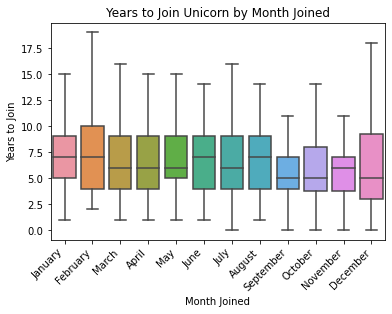

In [17]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Plot the data from the `companies` DataFrame.
sns.boxplot(data=companies, x="Month Joined", y="Years to Join", showfliers=False, order=month_order)

# Set the title of the plot.
plt.title("Years to Join Unicorn by Month Joined")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

## Step 4: Results and evaluation

### Visualize the time it took companies to reach unicorn status

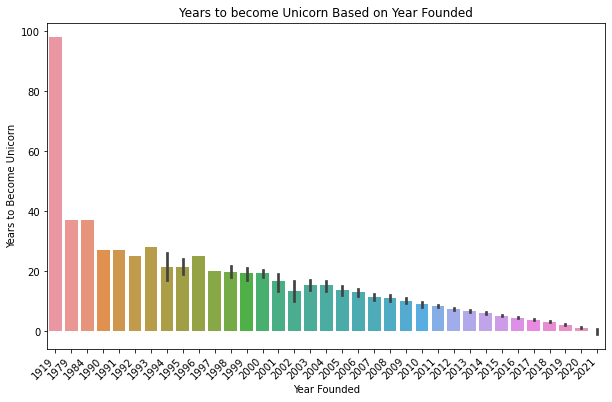

In [18]:
# Set the size of the plot.
plt.figure(figsize=(10,6))

# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.
sns.barplot(x=companies["Year Founded"], y=companies["Years to Join"])

# Set title
plt.title("Years to become Unicorn Based on Year Founded")

# Set x-axis label
plt.xlabel("Year Founded")

# Set y-axis label
plt.ylabel("Years to Become Unicorn")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

### Visualize the number of companies that joined per Quarter 


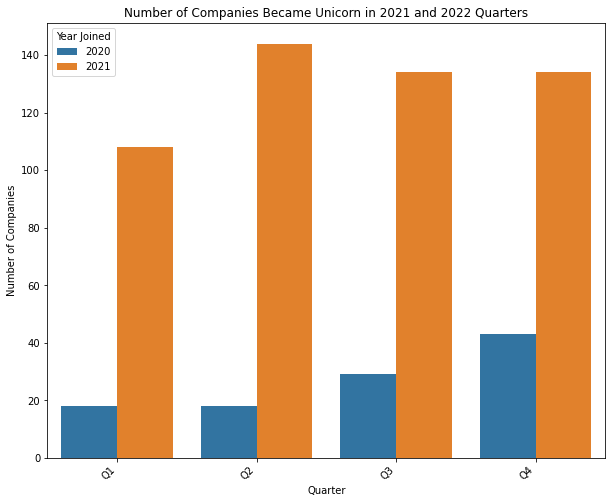

In [19]:
# Set the size of the plot.
plt.figure(figsize=(10,8))

# Create bar plot to visualize number of companies that joined per interval for the year of 2021 and 2022.
companies_by_quarter_20_21['Quarter Number'] = companies_by_quarter_20_21['Quarter Joined'].str[-2:]
companies_by_quarter_20_21['Year Joined'] = companies_by_quarter_20_21['Quarter Joined'].str[:4]
sns.barplot(x=companies_by_quarter_20_21["Quarter Number"], y=companies_by_quarter_20_21["Number of Company"], hue=companies_by_quarter_20_21["Year Joined"])

# Set the x-axis label.
plt.xlabel("Quarter")

# Set the y-axis label.
plt.ylabel("Number of Companies")

# Set the title.
plt.title("Number of Companies Became Unicorn in 2021 and 2022 Quarters")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45, horizontalalignment="right")

# Display the plot.
plt.show()

### Visualize the average valuation over the quarters


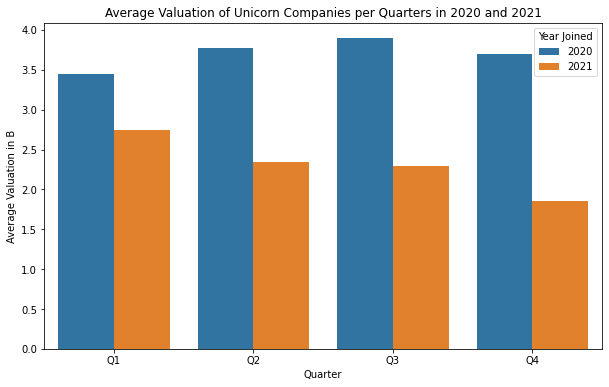

In [20]:
# Set the size of the plot.
plt.figure(figsize=(10,6))

# Create a grouped bar plot.
sns.barplot(data=companies_by_quarter_20_21, x="Quarter Number", y="Average Valuation", hue="Year Joined")

# Set the x-axis label.
plt.xlabel("Quarter")

# Set the y-axis label.
plt.ylabel("Average Valuation in B")

# Set the title.
plt.title("Average Valuation of Unicorn Companies per Quarters in 2020 and 2021")

# Display the plot.
plt.show()

## Conclusion

- In terms of company valuations and the number of new unicorns, there were interesting trends observed in 2020 and 2021. On average, the valuation of companies achieving unicorn status in 2020 was higher than those in 2021. However, the number of companies becoming unicorns in 2021 surpassed the count in 2020.
- Notably, the first quarter of 2021 saw the highest average valuation for companies achieving unicorn status, while the third quarter of 2020 had the highest average valuation for companies becoming unicorns. As we anticipate new entrants in the future, it is advisable to pay close attention to companies joining in the first and third quarters of the year due to their historically higher valuations.
- Our analysis revealed that the year 2015 witnessed the highest number of unicorn companies being founded, indicating a significant surge in unicorn formations during that period.
- Another insightful finding from the data analysis is that companies joining the unicorn club in the months of September and October tended to achieve this status in a shorter amount of time compared to companies joining in other months.

These key findings provide valuable insights for strategic decision-making, as they shed light on trends in unicorn company valuations, timing of entry into the unicorn status, and peak years for unicorn company formation.

**References**

Bhat, M.A. (2022, March).[*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 

